# Exploratory Data Analysis (EDA) of IBRD Loans and Credits for preprocessing

## Index

1. [Introduction](#introduction)
2. [Loading Data](#loading-data)
3. [Data Overview](#data-overview)
   - [Shape of the Data](#shape-of-the-data)
   - [Data Types](#data-types)
   - [Missing Values](#missing-values)
4. [Data Cleaning](#data-cleaning)
   - [Handling Missing Values](#handling-missing-values)
   - [Format Datetime Columns](#format-datetime-columns)
   - [Handling Duplicates](#handling-duplicates)
   - [Handling Outliers](#handling-outliers)
5. [Data Transformation](#data-transformation)
   - [Feature Scaling](#feature-scaling)
6. [Conclusion](#conclusion)


## Introduction
The Dataset we are using is of IBRD (International Bank for Reconstruction and Development) of loans and credits having a good look on this data, this data is well structured and a good candidate to learn preprocessing, visualisation and insight generation.
For this Notebook we are focusing on the EDA fot the preprocessing aspect of the data including handeling missing values, handeling outliers for further analysis and visualisation also we will be producing new features from this data set.
So Basic Goals for this Notebook are:
1. Removing duplicate rows
2. Handling missing values
3. Handeling outliers in this dataset
4. Generating New Features from the dataset

## Loading Data

In [1]:
# importing required libraries
import cudf

In [2]:
# Loading the Dataset
df = cudf.read_csv('data.csv')
# Dropping the index column
df = df.drop('Unnamed: 0',axis=1)

## Data Overview

In [3]:
# Basic Analysis of the dataset
df.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 1323796 entries, 0 to 1323795
Data columns (total 33 columns):
 #   Column                        Non-Null Count    Dtype
---  ------                        --------------    -----
 0   End of Period                 1323796 non-null  object
 1   Loan Number                   1323796 non-null  object
 2   Region                        1323796 non-null  object
 3   Country Code                  1323477 non-null  object
 4   Country                       1323796 non-null  object
 5   Borrower                      1314674 non-null  object
 6   Guarantor Country Code        1274746 non-null  object
 7   Guarantor                     1248397 non-null  object
 8   Loan Type                     1323796 non-null  object
 9   Loan Status                   1323796 non-null  object
 10  Interest Rate                 1293060 non-null  float64
 11  Currency of Commitment        0 non-null        int8
 12  Project ID                    1323754 non-n

In [4]:
df.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,...,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,10/31/2020 12:00:00 AM,IBRD2911S,MIDDLE EAST AND NORTH AFRICA,TN,Tunisia,Ministere du Plan Et du Dev. Regional,TN,Tunisia,SCPM,Fully Repaid,...,0.0,0.0,0.0,09/15/1998 12:00:00 AM,03/15/2005 12:00:00 AM,04/13/1988 12:00:00 AM,02/16/1988 12:00:00 AM,02/02/1989 12:00:00 AM,06/30/1995 12:00:00 AM,<NA>
1,10/31/2020 12:00:00 AM,IBRD2962S,MIDDLE EAST AND NORTH AFRICA,TN,Tunisia,Ministere du Plan Et du Dev. Regional,TN,Tunisia,SCPM,Fully Repaid,...,0.0,0.0,0.0,09/15/1998 12:00:00 AM,09/15/2005 12:00:00 AM,09/26/1988 12:00:00 AM,06/16/1988 12:00:00 AM,03/31/1989 12:00:00 AM,06/30/1991 12:00:00 AM,<NA>
2,10/31/2020 12:00:00 AM,IBRD3109S,MIDDLE EAST AND NORTH AFRICA,TN,Tunisia,Ministere du Plan Et du Dev. Regional,TN,Tunisia,SCPM,Fully Repaid,...,0.0,0.0,0.0,09/15/1998 12:00:00 AM,09/15/2006 12:00:00 AM,09/25/1989 12:00:00 AM,07/11/1989 12:00:00 AM,02/22/1990 12:00:00 AM,06/30/1993 12:00:00 AM,<NA>
3,10/31/2020 12:00:00 AM,IBRD3217S,MIDDLE EAST AND NORTH AFRICA,TN,Tunisia,Ministere du Plan Et du Dev. Regional,TN,Tunisia,SCPM,Fully Repaid,...,0.0,0.0,0.0,09/15/1998 12:00:00 AM,03/15/2007 12:00:00 AM,09/24/1990 12:00:00 AM,06/05/1990 12:00:00 AM,05/21/1991 12:00:00 AM,06/30/1997 12:00:00 AM,<NA>
4,11/30/2020 12:00:00 AM,IBRD2911S,MIDDLE EAST AND NORTH AFRICA,TN,Tunisia,Ministere du Plan Et du Dev. Regional,TN,Tunisia,SCPM,Fully Repaid,...,0.0,0.0,0.0,09/15/1998 12:00:00 AM,03/15/2005 12:00:00 AM,04/13/1988 12:00:00 AM,02/16/1988 12:00:00 AM,02/02/1989 12:00:00 AM,06/30/1995 12:00:00 AM,<NA>


### Shape of the Data

 Column names: End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Currency of Commitment,Project ID,Project Name,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date

 From above observation the dataset have 33 columns and 1323795 rows (Shape of the dataset)

### Data Types

According the Column name and Column Data:
Numerical Data Columns are: Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party
Datetime Columns are: End of Period,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
Columns with categorical data are: Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Currency of Commitment, Project Name
ID columns: Loan Number, Project ID 

### Missing Values


From Data oveerview we can see that there are missing values in the dataset
Visualizing the missing values in the dataset

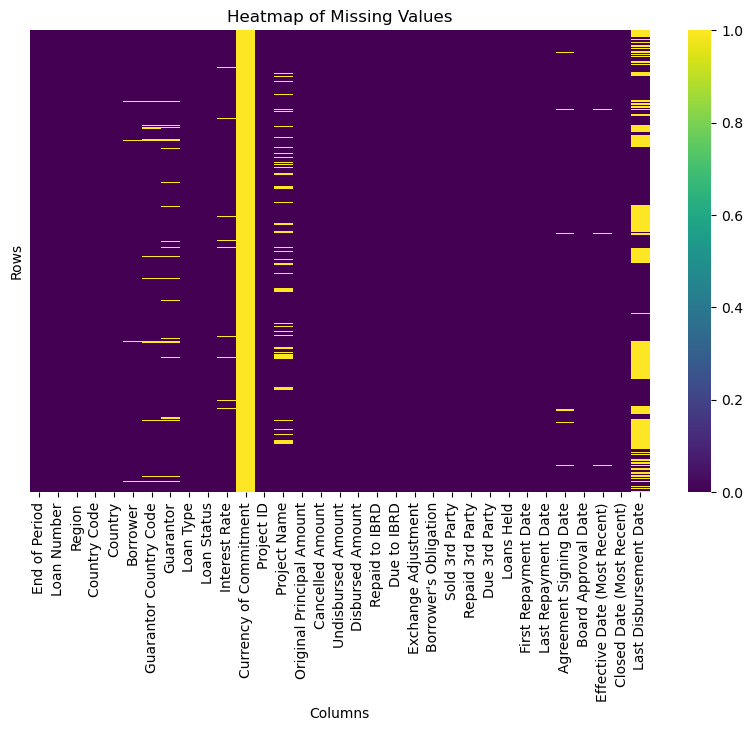

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Identify missing values
missing_values = df.isna()

# Convert to pandas DataFrame for visualization
missing_values_pd = missing_values.to_pandas()

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_pd, cmap='viridis', cbar=True, yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

From above observation the column Currency of commitment column is empty and the Last Disbursement Date column is has also signigficantly large number of missing values, in some datetime columns few rows are missing as these datetime columns are not in series but sorted randomly so there is no definitive way to determine a single logic to impute the missing values in those rows we can drop entire rows having missing value columns as they are significanctly less in the data and it wont significantly affect the analysis so dropping such rows and columns

#### Note1: in the code add the threshold such that column having 40% or more missing values are dropped
#### Note2: in the code add such that if there are missing values in rows of datetime column drop such entire rows
#### Note3: in the code add such that if there are missing values in the rows of categorical columns replace them with Unknown

## Data Cleaning

### Handling Missing Values

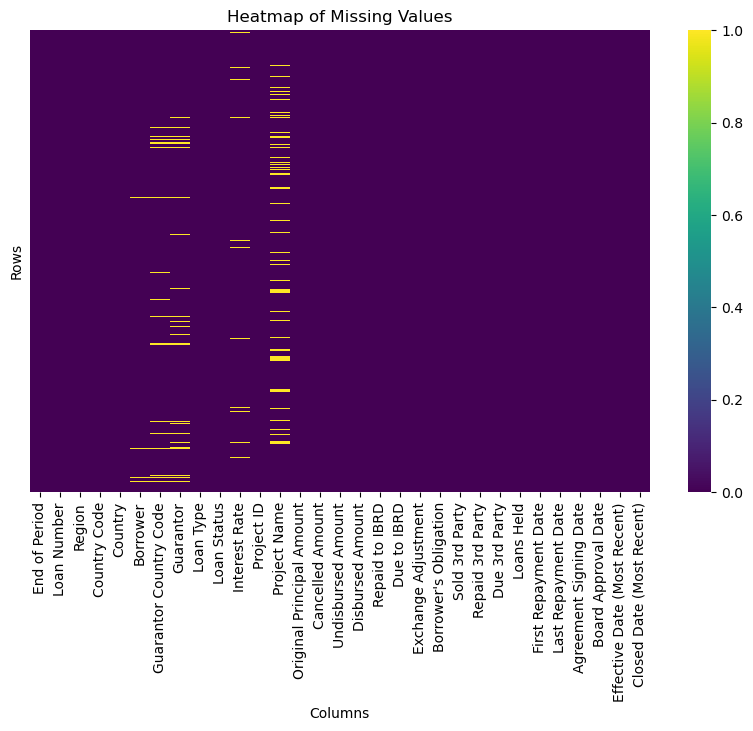

In [6]:
datetime_columns = ["End of Period","First Repayment Date","Last Repayment Date","Agreement Signing Date","Board Approval Date","Effective Date (Most Recent)","Closed Date (Most Recent)"]
def drop_col_row(df, datetime_columns):
    # Step 1: Drop columns with missing values more than 40 percent
    threshold = 0.6 * len(df)
    df = df.dropna(axis=1, thresh=threshold)

    #step 2: Drop rows with missing values in datetime columns
    for column in datetime_columns:
        df = df.dropna(subset=[column])
    df = df.reset_index(drop=True)
    return df

df = drop_col_row(df,datetime_columns)

# Identify missing values
missing_values = df.isna()

# Convert to pandas DataFrame for visualization
missing_values_pd = missing_values.to_pandas()

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_pd, cmap='viridis', cbar=True, yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()









In [7]:
df.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 1300733 entries, 0 to 1300732
Data columns (total 31 columns):
 #   Column                        Non-Null Count    Dtype
---  ------                        --------------    -----
 0   End of Period                 1300733 non-null  object
 1   Loan Number                   1300733 non-null  object
 2   Region                        1300733 non-null  object
 3   Country Code                  1300415 non-null  object
 4   Country                       1300733 non-null  object
 5   Borrower                      1291613 non-null  object
 6   Guarantor Country Code        1252977 non-null  object
 7   Guarantor                     1227013 non-null  object
 8   Loan Type                     1300733 non-null  object
 9   Loan Status                   1300733 non-null  object
 10  Interest Rate                 1275089 non-null  float64
 11  Project ID                    1300695 non-null  object
 12  Project Name                  1144488 non

In [8]:
#### Columns with categorical data are: Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Currency of Commitment, Project Name
#### ID columns: Loan Number, Project ID 

categorical_columns = ['Region', 'Country Code', 'Country', 'Borrower', 'Guarantor Country Code', 'Guarantor', 'Loan Type', 'Loan Status', 'Project Name']
id_column = ['Loan Number', 'Project ID']
columns_to_replace = categorical_columns + id_column

# Replace NaNs with "Unknown" in selected columns
for column in columns_to_replace:
    df[column] = df[column].fillna("Unknown")

df.to_csv('processed.csv')



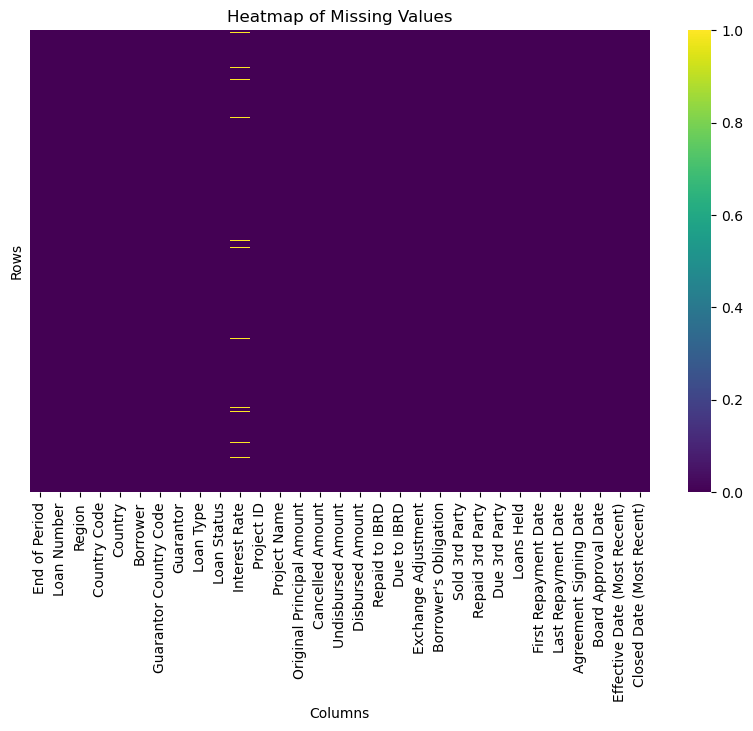

In [9]:
# Identify missing values
missing_values = df.isna()

# Convert to pandas DataFrame for visualization
missing_values_pd = missing_values.to_pandas()

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_pd, cmap='viridis', cbar=True, yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [10]:
#### Numerical Data Columns are: Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party
import cupy as cp
from scipy.stats import gaussian_kde
numerical_columns = ["Interest Rate","Original Principal Amount","Cancelled Amount","Undisbursed Amount","Disbursed Amount","Repaid to IBRD","Due to IBRD","Exchange Adjustment","Borrower's Obligation","Sold 3rd Party","Repaid 3rd Party","Due 3rd Party"]
def kde_imputation(series):
    valid_data = series.dropna().to_pandas()
    kde = gaussian_kde(valid_data)
    missing_indices = cp.where(series.isna().values)[0]
    imputed_values = kde.resample(len(missing_indices)).flatten()
    series[missing_indices] = imputed_values
    return series

# Apply KDE imputation to numerical columns
for col in numerical_columns:
    df[col] = kde_imputation(df[col])


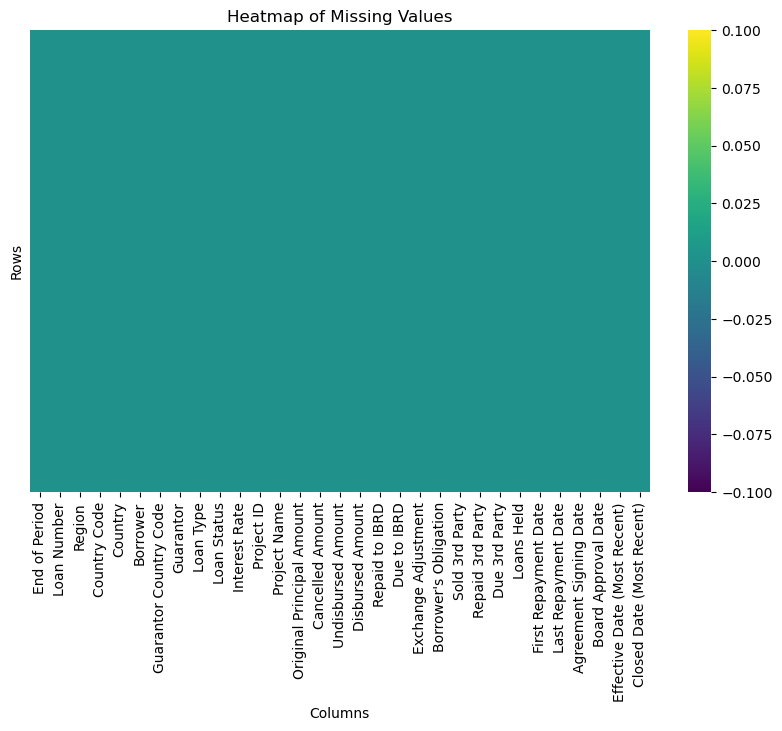

In [11]:
# Identify missing values
missing_values = df.isna()

# Convert to pandas DataFrame for visualization
missing_values_pd = missing_values.to_pandas()

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_pd, cmap='viridis', cbar=True, yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

### Format Datetime Columns

## as the time from the datetime columns have the same time lets format and remove the time componenet of the datetime columns

In [12]:
datetime_columns = ["End of Period","First Repayment Date","Last Repayment Date","Agreement Signing Date","Board Approval Date","Effective Date (Most Recent)","Closed Date (Most Recent)"]
for column in datetime_columns:
    df[column] = cudf.to_datetime(df[column], format='%m/%d/%Y %I:%M:%S %p')
    df[column] = df[column].dt.strftime('%d/%m/%Y')

In [13]:
df.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,...,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent)
0,31/10/2020,IBRD2911S,MIDDLE EAST AND NORTH AFRICA,TN,Tunisia,Ministere du Plan Et du Dev. Regional,TN,Tunisia,SCPM,Fully Repaid,...,0.0,0.0,0.0,0.0,15/09/1998,15/03/2005,13/04/1988,16/02/1988,02/02/1989,30/06/1995
1,31/10/2020,IBRD2962S,MIDDLE EAST AND NORTH AFRICA,TN,Tunisia,Ministere du Plan Et du Dev. Regional,TN,Tunisia,SCPM,Fully Repaid,...,0.0,0.0,0.0,0.0,15/09/1998,15/09/2005,26/09/1988,16/06/1988,31/03/1989,30/06/1991
2,31/10/2020,IBRD3109S,MIDDLE EAST AND NORTH AFRICA,TN,Tunisia,Ministere du Plan Et du Dev. Regional,TN,Tunisia,SCPM,Fully Repaid,...,0.0,0.0,0.0,0.0,15/09/1998,15/09/2006,25/09/1989,11/07/1989,22/02/1990,30/06/1993
3,31/10/2020,IBRD3217S,MIDDLE EAST AND NORTH AFRICA,TN,Tunisia,Ministere du Plan Et du Dev. Regional,TN,Tunisia,SCPM,Fully Repaid,...,0.0,0.0,0.0,0.0,15/09/1998,15/03/2007,24/09/1990,05/06/1990,21/05/1991,30/06/1997
4,30/11/2020,IBRD2911S,MIDDLE EAST AND NORTH AFRICA,TN,Tunisia,Ministere du Plan Et du Dev. Regional,TN,Tunisia,SCPM,Fully Repaid,...,0.0,0.0,0.0,0.0,15/09/1998,15/03/2005,13/04/1988,16/02/1988,02/02/1989,30/06/1995


### Handling Duplicates

In [14]:
# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
52


In [15]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Check the shape of the dataset after removing duplicates
print("\nShape of the dataset after removing duplicates:")
print(df_cleaned.shape)


Shape of the dataset after removing duplicates:
(1300681, 31)


### Handling Outliers

In [16]:
capping_info = []
for col in numerical_columns:
    non_zero_mask = (df[col] != 0) & (~df[col].isnull())
    non_zero_series = df.loc[non_zero_mask, col]

    if len(non_zero_series) > 0:
        Q1 = non_zero_series.quantile(0.25)
        Q3 = non_zero_series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        original_values = df[col].copy()
        df.loc[non_zero_mask, col] = df.loc[non_zero_mask, col].clip(lower=lower_bound, upper=upper_bound)
        outliers_capped = ((df[col] != original_values) & non_zero_mask).sum()
        capping_info.append(f"Handled {outliers_capped} outliers in column '{col}'.")
    else:
        capping_info.append(f"No non-zero values in column '{col}'. Skipping outlier handling.")

print("\n".join(capping_info))

Handled 13050 outliers in column 'Interest Rate'.
Handled 115351 outliers in column 'Original Principal Amount'.
Handled 80565 outliers in column 'Cancelled Amount'.
Handled 7951 outliers in column 'Undisbursed Amount'.
Handled 127204 outliers in column 'Disbursed Amount'.
Handled 110533 outliers in column 'Repaid to IBRD'.
Handled 34286 outliers in column 'Due to IBRD'.
Handled 37036 outliers in column 'Exchange Adjustment'.
Handled 38101 outliers in column 'Borrower's Obligation'.
Handled 12800 outliers in column 'Sold 3rd Party'.
Handled 12800 outliers in column 'Repaid 3rd Party'.
Handled 6 outliers in column 'Due 3rd Party'.


## Data Transformation

## Feature Scaling

Taking a good look at the data we can see that the datetime columns agreemnet signing date and the end of period are avalable in the dataset. So we can make a new feature in the dataset "Loan Duration" which is the difference between the end of period and the agreemnet signing date.

In [17]:

if not isinstance(df, cudf.DataFrame):
    raise TypeError("Input must be a cuDF DataFrame")
    
df.columns = df.columns.str.lower().str.strip()
    
required_columns = ['end of period', 'agreement signing date']
if not all(col in df.columns for col in required_columns):
    raise KeyError("Required columns for loan duration calculation are missing")
    
for col in required_columns:
    temp_col = f'temp_{col}'
    if df[col].dtype != 'datetime64[ns]':
        df[temp_col] = cudf.to_datetime(df[col], format='%d/%m/%Y')
    else:
        df[temp_col] = df[col]
    
df['loan duration (days)'] = (df['temp_end of period'] - df['temp_agreement signing date']).dt.days
df['loan duration (months)'] = ((df['temp_end of period'].dt.year - df['temp_agreement signing date'].dt.year) * 12 + 
                                (df['temp_end of period'].dt.month - df['temp_agreement signing date'].dt.month))
df['loan duration (years)'] = df['loan duration (days)'] / 365.25

df = df.drop(columns=[f'temp_{col}' for col in required_columns])

new_columns = ['loan duration (days)', 'loan duration (months)', 'loan duration (years)']
existing_columns = [col for col in df.columns if col not in new_columns]
df = df[new_columns + existing_columns]
df.head()

,loan duration (days),loan duration (months),loan duration (years),end of period,loan number,region,country code,country,borrower,guarantor country code,...,sold 3rd party,repaid 3rd party,due 3rd party,loans held,first repayment date,last repayment date,agreement signing date,board approval date,effective date (most recent),closed date (most recent)
0,11889,390,32.550308,31/10/2020,IBRD2911S,MIDDLE EAST AND NORTH AFRICA,TN,Tunisia,Ministere du Plan Et du Dev. Regional,TN,...,0.0,0.0,0.0,0.0,15/09/1998,15/03/2005,13/04/1988,16/02/1988,02/02/1989,30/06/1995
1,11723,385,32.095825,31/10/2020,IBRD2962S,MIDDLE EAST AND NORTH AFRICA,TN,Tunisia,Ministere du Plan Et du Dev. Regional,TN,...,0.0,0.0,0.0,0.0,15/09/1998,15/09/2005,26/09/1988,16/06/1988,31/03/1989,30/06/1991
2,11359,373,31.099247,31/10/2020,IBRD3109S,MIDDLE EAST AND NORTH AFRICA,TN,Tunisia,Ministere du Plan Et du Dev. Regional,TN,...,0.0,0.0,0.0,0.0,15/09/1998,15/09/2006,25/09/1989,11/07/1989,22/02/1990,30/06/1993
3,10995,361,30.102669,31/10/2020,IBRD3217S,MIDDLE EAST AND NORTH AFRICA,TN,Tunisia,Ministere du Plan Et du Dev. Regional,TN,...,0.0,0.0,0.0,0.0,15/09/1998,15/03/2007,24/09/1990,05/06/1990,21/05/1991,30/06/1997
4,11919,391,32.632444,30/11/2020,IBRD2911S,MIDDLE EAST AND NORTH AFRICA,TN,Tunisia,Ministere du Plan Et du Dev. Regional,TN,...,0.0,0.0,0.0,0.0,15/09/1998,15/03/2005,13/04/1988,16/02/1988,02/02/1989,30/06/1995


## Conclusion

### Data Overview:
- **Shape of the DataFrame**: The dataset contains a significant number of records and columns.
- **Missing Values**: A detailed analysis of missing values per column was conducted. Columns with a high percentage of missing values were identified and dropped.

### Data Cleaning:
- **Datetime Columns**: Essential datetime columns were processed, and their formats were standardized to '%d/%m/%Y'.
- **Duplicates**: Duplicate rows were removed, ensuring the uniqueness of records.

### Imputation:
- **KDE Imputation**: Missing values in numerical columns were imputed using Kernel Density Estimation (KDE) for a more statistically sound filling.
- **Categorical and ID Columns**: Missing values in categorical and ID columns were filled with the string 'Unknown'.

### Feature Engineering:
- **Loan Duration**: New features were created to capture the duration of loans in days, months, and years based on the 'end of period' and 'agreement signing date' columns.

### Outlier Handling:
- **IQR-Based Capping**: Outliers in numerical columns were capped using the Interquartile Range (IQR) method, ensuring that extreme values were brought within reasonable bounds while retaining the non-zero values.

### Final Data Quality:
- **Cleaned Data**: The data was successfully cleaned and prepared for further analysis or modeling. The process ensured that missing values were handled, outliers were capped, and new features were added to enhance the dataset's usability.

Overall, the EDA highlights the thorough cleaning and preprocessing steps applied to the dataset, resulting in a well-prepared dataset ready for downstream tasks such as machine learning or detailed analysis.